In [1]:
# Initial imports
import numpy as np
import random
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
#from MCForecastTools import MCSimulation
import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
%matplotlib inline
import yfinance as yf
#from alp

In [2]:
# There are 2 tables on the Wikipedia page
# we want the first table

test=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = test[0]
second_table = test[1]

df = first_table
df.isnull()


,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
500,False,False,False,False,False,False,False,False,False
501,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False


In [3]:
#Drop all columns except Symbol and Date_first_added
df.drop(['Security', 'SEC filings', 'GICS Sector', 'GICS Sub-Industry','Headquarters Location', 'CIK', 'Founded'], axis = 1, inplace = True)
df.rename(columns={"Date first added":"Date_first_added"}, inplace = True)
df.dtypes

Symbol              object
Date_first_added    object
dtype: object

In [4]:
df.dropna()

,Symbol,Date_first_added
0,MMM,1976-08-09
1,ABT,1964-03-31
2,ABBV,2012-12-31
3,ABMD,2018-05-31
4,ACN,2011-07-06
...,...,...
500,YUM,1997-10-06
501,ZBRA,2019-12-23
502,ZBH,2001-08-07
503,ZION,2001-06-22


In [105]:
#df.columns
base_line_date = pd.to_datetime('2000-01-01')
dates = []
counter = 0

df.Date_first_added = df.Date_first_added.str[0:10]

added_b4_2000 = df[pd.to_datetime(df['Date_first_added']) < base_line_date]    
#added_b4_2000.dropna(inplace=True)   
added_b4_2000.reset_index(inplace=True)
added_b4_2000

,index,Symbol,Date_first_added
0,0,MMM,1976-08-09
1,1,ABT,1964-03-31
2,6,ADBE,1997-05-05
3,9,AES,1998-10-02
4,10,AFL,1999-05-28
...,...,...,...
158,486,WFC,1976-06-30
159,494,WMB,1975-03-31
160,497,XEL,1957-03-04
161,498,XLNX,1999-11-08


In [106]:
#create a list of stock symbols that have been added to SP500 before 2000
urange = len(added_b4_2000)

stock_port = []
port_df = pd.DataFrame()
for i in range (0, 30):
    stock = added_b4_2000.iloc[random.randint(0, urange)].Symbol
    stock_port.append(stock)
print(stock_port)
    
    
    

['HES', 'AFL', 'NUE', 'ORCL', 'BF.B', 'EXC', 'GPS', 'PHM', 'SHW', 'HWM', 'SLB', 'COP', 'AMAT', 'EMN', 'PNC', 'WFC', 'XLNX', 'GWW', 'WMB', 'AVY', 'CVX', 'ADI', 'SEE', 'NSC', 'CL', 'PFE', 'SCHW', 'HON', 'DTE', 'RF']


In [109]:
tickers = ""

tickers = ' '.join(stock_port)

port_df = yf.download(tickers, start='1993-02-01', end='2019-12-01')
#port_df

[*********************100%***********************]  30 of 30 completed

1 Failed download:
- BF.B: No data found for this date range, symbol may be delisted


In [110]:
clean_dataset = port_df['Adj Close'].copy()
#port_df.drop(columns = [(    'Close', 'AEP'),            (    'Close', 'AFL'),            (    'Close', 'AXP'),            (    'Close', 'CMS'),            (    'Close', 'ECL'),            (    'Close', 'GIS'),(    'Close', 'ITW'),(    'Close',  'SO'),(    'Close', 'TAP'),(    'Close', 'YUM'), (     'High', 'AEP'),(     'High', 'AFL'),(     'High', 'AXP'),(     'High', 'CMS'),(     'High', 'ECL'),(     'High', 'GIS'),(     'High', 'ITW'), (     'High',  'SO'),(     'High', 'TAP'), (     'High', 'YUM'),(      'Low', 'AEP'), (      'Low', 'AFL'), (      'Low', 'AXP'), (      'Low', 'CMS'),(      'Low', 'ECL'), (      'Low', 'GIS'), (      'Low', 'ITW'), (      'Low',  'SO'),(      'Low', 'TAP'),(      'Low', 'YUM'),(     'Open', 'AEP'),(     'Open', 'AFL'), (     'Open', 'AXP'),(     'Open', 'CMS'),(     'Open', 'ECL'),(     'Open', 'GIS'),(     'Open', 'ITW'), (     'Open',  'SO'),(     'Open', 'TAP'),(     'Open', 'YUM'),(   'Volume', 'AEP'),(   'Volume', 'AFL'),(   'Volume', 'AXP'),(   'Volume', 'CMS'),(   'Volume', 'ECL'), (   'Volume', 'GIS'), (   'Volume', 'ITW'),(   'Volume',  'SO'),(   'Volume', 'TAP'),(   'Volume', 'YUM')], inplace=True)
clean_dataset.mean(axis=1)

Date
1993-02-01     5.180410
1993-02-02     5.192888
1993-02-03     5.260776
1993-02-04     5.357065
1993-02-05     5.361570
                ...    
2019-11-22    81.364474
2019-11-25    82.059967
2019-11-26    82.162848
2019-11-27    82.292879
2019-11-29    81.852127
Length: 6758, dtype: float64

<AxesSubplot:xlabel='Date'>

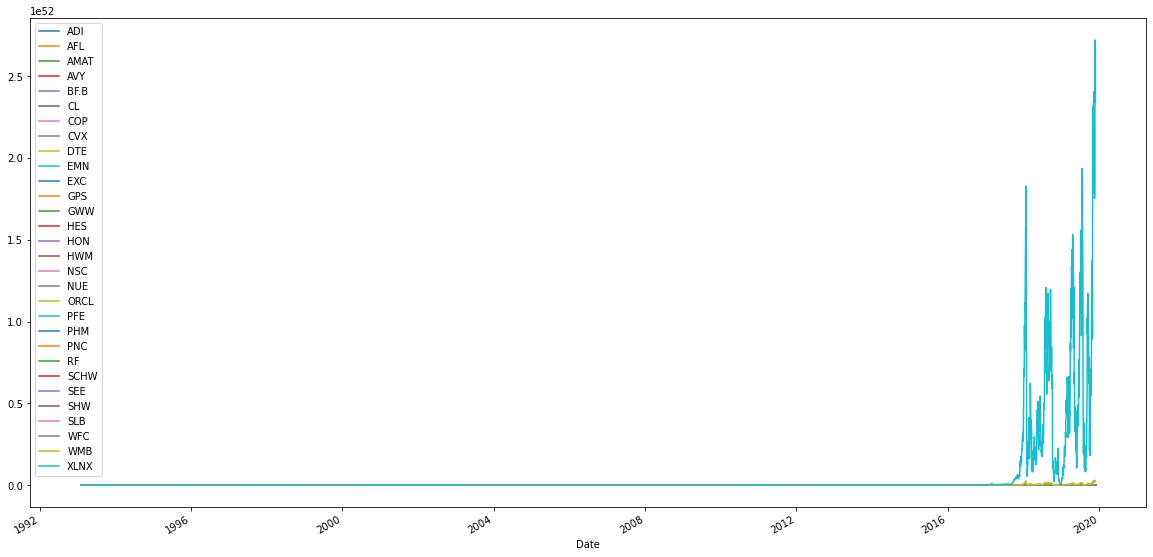

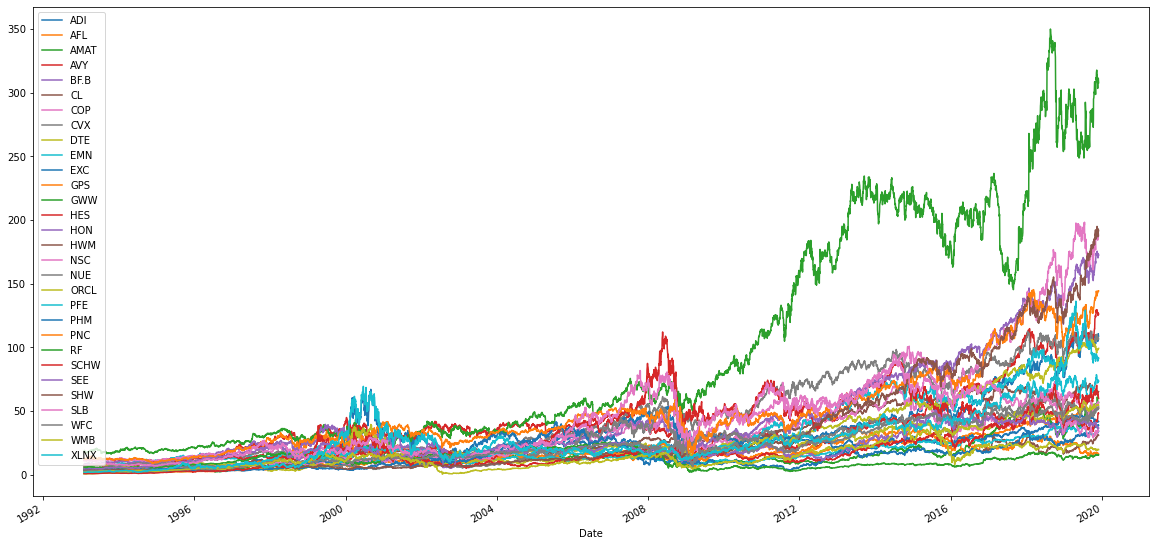

In [114]:
#clean_dataset.mean(axis=1).plot(kind='line', figsize=(15,10))
clean_dataset1 = clean_dataset.pct_change()
clean_dataset2= (1+ clean_dataset).cumprod(axis=1)
clean_dataset2.plot(figsize=(20,10))
clean_dataset.plot(figsize=(20,10))
#clean_dataset.plot(kind='line', figsize=(20,10))

In [ ]:
clean_dataset.pct_change().plot()